# E-Commerce Website Data

This notebook will explore the women's clothing e-commerce dataset from Kaggle.com. 

We begin as always by importing the necessary modules.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from janitor import clean_names
import math

# Set plot aesthetics
sns.set(rc={'figure.figsize':(10, 7)})
sns.set_style('whitegrid')

In [2]:
path_to_dataraw = '../data-raw/'
dataset_name = 'womens_clothing_ecom_review.csv'
clothes_raw = pd.read_csv(
    path_to_dataraw + dataset_name,
    index_col=0
    )\
    .clean_names()

clothes_raw.head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
clothes_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing_id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review_text              22641 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended_ind          23486 non-null  int64 
 6   positive_feedback_count  23486 non-null  int64 
 7   division_name            23472 non-null  object
 8   department_name          23472 non-null  object
 9   class_name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


## Visualizations 

Let's visualize aspects of the dataset.

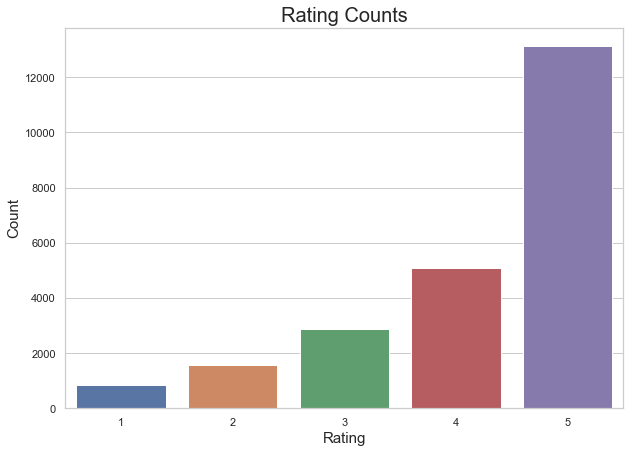

In [4]:
clothes_rating_plot = sns.countplot(
    x='rating',
    data=clothes_raw,
    alpha=0.8
)
clothes_rating_plot.set_title('Rating Counts', size=20)
clothes_rating_plot.set_xlabel('Rating', size=15)
clothes_rating_plot.set_ylabel('Count', size=15);

We Can see from the plot above that there is a high class imbalance. We may want to consider adding weights to each class.

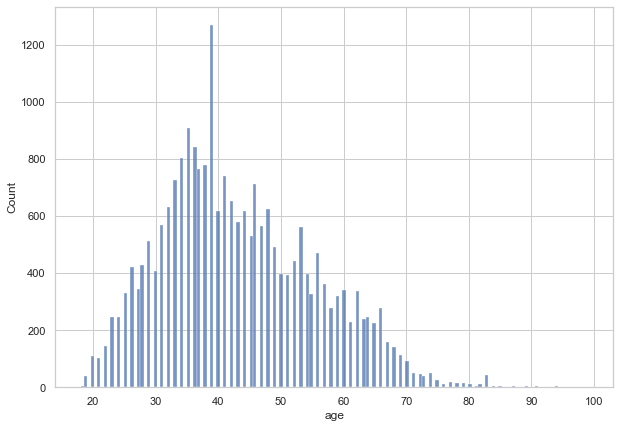

In [11]:
age_hist = sns.histplot(
    x='age',
    data=clothes_raw,
    bins=round(math.sqrt((len(clothes_raw))))
);

Age appears to have a very slight right-skew and be unimodal.

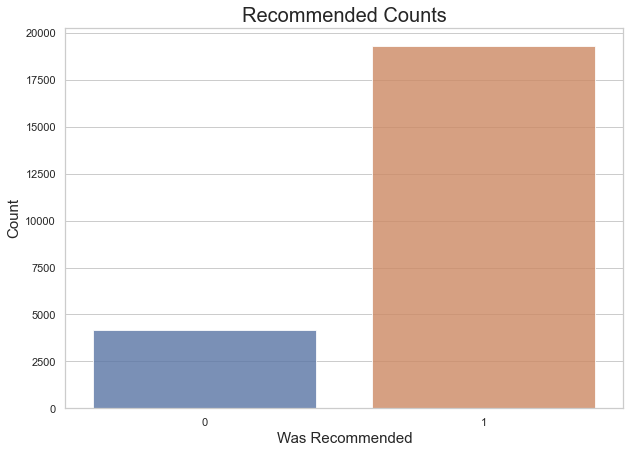

In [16]:
rec_plot = sns.countplot(
    x='recommended_ind',
    data=clothes_raw,
    alpha=0.8
)
rec_plot.set_title('Recommended Counts', size=20)
rec_plot.set_xlabel('Was Recommended', size=15)
rec_plot.set_ylabel('Count', size=15);

## Text Analysis

There is a field that holds text reviews. We will see if we can gain insights from the text data and possibly use it to predict rating.

In [20]:
clothes_raw.loc[18, 'review_text']

"A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a dressier outfit.  i am 5' 5'', about 135 and the small fits great."